## Head Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

### Formeln herholen
- x-Komponente: $\cos(90° - θ_{xy}) \cdot \sin(90° - θ_{xz})$
- y-Komponente: $\cos(θ_{xz})$
- z-Komponente: $\sin(90° - θ_{xy})$

In [2]:
A = [0,0,1]
B = [2,3,4]
AB = [2,3,3]

In [3]:
# winkel der oben unten schaut
def calc_theta(point):
    x, y, z = point
    return math.degrees(math.atan2(math.sqrt(x**2 + y**2), z))

# Winkel der richtung 360 grad schaut
def calc_phi(point):
    x, y, z = point
    return math.degrees(math.atan2(y, x))

def calc_vec(theta, phi, length):
    # Umwandlung von Grad in Radiant
    theta_rad = math.radians(theta)
    phi_rad = math.radians(phi)
    
    # Berechnung der kartesischen Koordinaten
    x = length * math.sin(theta_rad) * math.cos(phi_rad)
    y = length * math.sin(theta_rad) * math.sin(phi_rad)
    z = length * math.cos(theta_rad)
    
    return x, y, z

In [4]:
theta = calc_theta(AB)
phi = calc_phi(AB)
m = calc_vec(theta, phi, 1)

In [5]:
print(f"Theta: {theta:.2f}°, Phi: {phi:.2f}°")
print(f"Berechneter Vektor: {m}")
print(f"Originaler Vektor AB: {AB}")

Theta: 50.24°, Phi: 56.31°
Berechneter Vektor: (0.4264014327112209, 0.6396021490668312, 0.6396021490668313)
Originaler Vektor AB: [2, 3, 3]


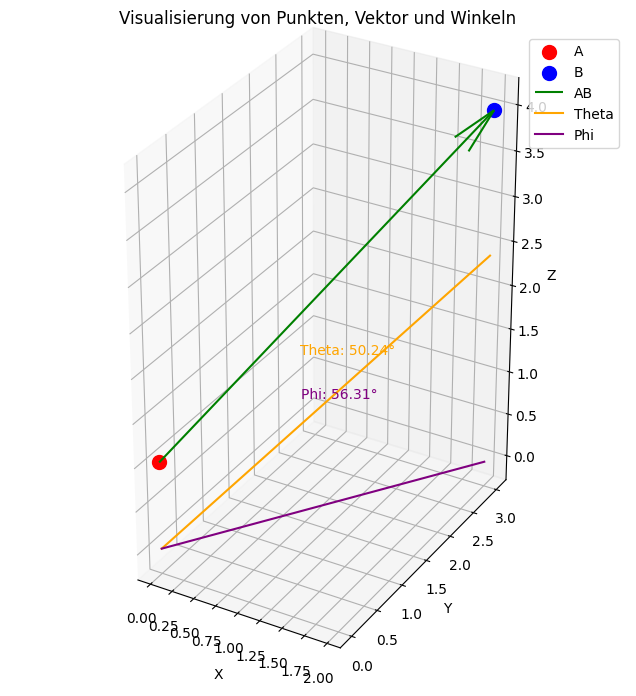

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotten der Punkte A und B
ax.scatter(*A, color='r', s=100, label='A')
ax.scatter(*B, color='b', s=100, label='B')

# Plotten des Vektors AB
ax.quiver(*A, *AB, color='g', arrow_length_ratio=0.1, label='AB')

# Visualisierung von Theta
theta_x = np.linspace(0, AB[0], 100)
theta_y = np.linspace(0, AB[1], 100)
theta_z = np.sqrt(AB[0]**2 + AB[1]**2) / np.max([AB[0], AB[1]]) * theta_x
ax.plot(theta_x, theta_y, theta_z, color='orange', label='Theta')

# Visualisierung von Phi
phi_x = np.linspace(0, AB[0], 100)
phi_y = np.linspace(0, AB[1], 100)
phi_z = np.zeros_like(phi_x)
ax.plot(phi_x, phi_y, phi_z, color='purple', label='Phi')

# Beschriftungen und Titel
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualisierung von Punkten, Vektor und Winkeln')
ax.legend()

# Anzeigen der Winkel
ax.text(1, 1, 2, f'Theta: {theta:.2f}°', color='orange')
ax.text(1, 1, 1.5, f'Phi: {phi:.2f}°', color='purple')

# Gleiche Skalierung für alle Achsen
ax.set_box_aspect((np.ptp(ax.get_xlim()), np.ptp(ax.get_ylim()), np.ptp(ax.get_zlim())))

plt.show()

### Daten anschauen was zeigt die holo lens

In [7]:
df = pd.read_csv("data0/data.csv")

In [8]:
df.columns

Index(['Timestamp', 'HoloLens Eye Tracker Timestamp', 'Calibration Valid',
       'Combined Gaze Valid', 'Combined Gaze Origin X',
       'Combined Gaze Origin Y', 'Combined Gaze Origin Z',
       'Combined Gaze Direction X', 'Combined Gaze Direction Y',
       'Combined Gaze Direction Z', 'Left Gaze Valid', 'Left Gaze Origin X',
       'Left Gaze Origin Y', 'Left Gaze Origin Z', 'Left Gaze Direction X',
       'Left Gaze Direction Y', 'Left Gaze Direction Z', 'Right Gaze Valid',
       'Right Gaze Origin X', 'Right Gaze Origin Y', 'Right Gaze Origin Z',
       'Right Gaze Direction X', 'Right Gaze Direction Y',
       'Right Gaze Direction Z', 'Left Eye Openness Valid',
       'Left Eye Openness', 'Right Eye Openness Valid', 'Right Eye Openness',
       'Vergence Distance Valid', 'Vergence Distance',
       'HoloLens Video Timestamp', 'Focal Length X', 'Focal Length Y',
       'Principal Point X', 'Principal Point Y', 'Image Filename',
       'HoloLens Position X', 'HoloLens Position 

In [9]:
ls = ['Timestamp','HoloLens Position X','HoloLens Position Y','HoloLens Position Z','HoloLens Forward X','HoloLens Forward Y','HoloLens Forward Z','HoloLens Up X','HoloLens Up Y','HoloLens Up Z']

In [10]:
fil_df = df[ls]

In [11]:
fil_df.columns

Index(['Timestamp', 'HoloLens Position X', 'HoloLens Position Y',
       'HoloLens Position Z', 'HoloLens Forward X', 'HoloLens Forward Y',
       'HoloLens Forward Z', 'HoloLens Up X', 'HoloLens Up Y',
       'HoloLens Up Z'],
      dtype='object')

In [12]:
row = fil_df.iloc[0]

In [13]:
row

Timestamp              2024-10-28T23:18:44.435378
HoloLens Position X                      0.075804
HoloLens Position Y                      0.450896
HoloLens Position Z                     -0.627165
HoloLens Forward X                       0.064874
HoloLens Forward Y                      -0.589433
HoloLens Forward Z                      -0.805208
HoloLens Up X                            0.203402
HoloLens Up Y                            0.797779
HoloLens Up Z                           -0.567606
Name: 0, dtype: object

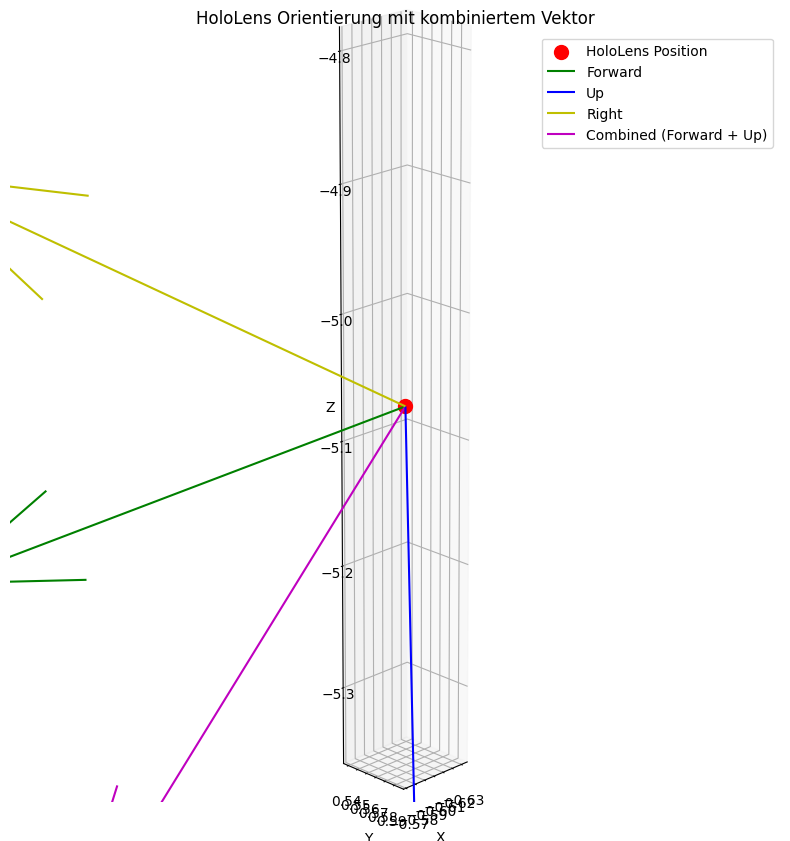

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("data0/data.csv")
# HoloLens Daten
position = np.array([-0.60201, 0.567211, -5.072601])
forward = np.array([0.214399, -0.85553, -0.471276])
up = np.array([0.48378, 0.512168, -0.709676])

# Berechnung des Right-Vektors (Kreuzprodukt von Forward und Up)
right = np.cross(forward, up)

# Kombinierter Vektor aus Forward und Up
combined = forward + up
# Normalisierung des kombinierten Vektors
combined = combined / np.linalg.norm(combined)

# Erstellung der Figur
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Skalierungsfaktor für die Vektoren
scale = 0.5

# Plotten der Position
ax.scatter(*position, color='r', s=100, label='HoloLens Position')

# Plotten der Vektoren
ax.quiver(*position, *forward*scale, color='g', label='Forward')
ax.quiver(*position, *up*scale, color='b', label='Up')
ax.quiver(*position, *right*scale, color='y', label='Right')
ax.quiver(*position, *combined*scale, color='m', label='Combined (Forward + Up)')

# Beschriftungen und Titel
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('HoloLens Orientierung mit kombiniertem Vektor')
ax.legend()

# Gleiche Skalierung für alle Achsen
ax.set_box_aspect((np.ptp(ax.get_xlim()), np.ptp(ax.get_ylim()), np.ptp(ax.get_zlim())))

# Anpassen der Ansicht
ax.view_init(elev=20, azim=45)

plt.show()

In [15]:
import pygame
import pandas as pd
import numpy as np
from pygame.math import Vector3

# Pygame Initialisierung
pygame.init()
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

# Farben
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)

# Laden Sie hier Ihr DataFrame

# Funktion zur Umwandlung von 3D-Koordinaten in 2D-Bildschirmkoordinaten
def to_screen_coords(x, y, z):
    scale = 100  # Anpassen Sie dies nach Bedarf
    return (width // 2 + int(x * scale), height // 2 - int(y * scale))

# Hauptschleife
running = True
frame = 0
while running and frame < len(df):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill(BLACK)

    # Daten für den aktuellen Frame abrufen
    row = df.iloc[frame]
    pos = Vector3(row['HoloLens Position X'], row['HoloLens Position Y'], row['HoloLens Position Z'])
    forward = Vector3(row['HoloLens Forward X'], row['HoloLens Forward Y'], row['HoloLens Forward Z'])
    up = Vector3(row['HoloLens Up X'], row['HoloLens Up Y'], row['HoloLens Up Z'])

    # Kombinierte Blickrichtung berechnen
    combined = (forward + up).normalize()

    # Position zeichnen
    screen_pos = to_screen_coords(pos.x, pos.y, pos.z)
    pygame.draw.circle(screen, RED, screen_pos, 5)

    # Blickrichtung zeichnen
    end_pos = pos + combined * 0.5  # Skalieren Sie dies nach Bedarf
    screen_end = to_screen_coords(end_pos.x, end_pos.y, end_pos.z)
    pygame.draw.line(screen, GREEN, screen_pos, screen_end, 2)

    # Text für Timestamp anzeigen
    font = pygame.font.Font(None, 36)
    text = font.render(str(row['Timestamp']), True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()
    clock.tick(30)  # Begrenzt auf 30 FPS, passen Sie dies nach Bedarf an

    frame += 1

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [16]:
import pygame
import pandas as pd
import numpy as np
import os
from pygame.math import Vector3

# Initialize Pygame
pygame.init()
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

# Colors
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
WHITE = (255, 255, 255)

# Load your DataFrame
df = pd.read_csv("data0/data.csv")  # Replace with your CSV file name

# Function to convert 3D coordinates to 2D screen coordinates
def to_screen_coords(x, y, z):
    scale = 100  # Adjust this as needed
    return (width // 2 + int(x * scale), height // 2 - int(y * scale))

# Main loop
running = True
frame = 0
while running and frame < len(df):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear screen
    screen.fill(BLACK)

    # Get data for the current frame
    row = df.iloc[frame]
    
    # Load the current image
    image_path = row['Image Filename']  # Ensure Images folder path is correct
    if os.path.exists(image_path):
        image = pygame.image.load(image_path)
        image = pygame.transform.scale(image, (width, height))  # Scale to fit the screen
        screen.blit(image, (0, 0))

    # Draw gaze points if valid

    # Combined Gaze
    if row['Combined Gaze Valid']:
        combined_origin = Vector3(row['Combined Gaze Origin X'], row['Combined Gaze Origin Y'], row['Combined Gaze Origin Z'])
        combined_direction = Vector3(row['Combined Gaze Direction X'], row['Combined Gaze Direction Y'], row['Combined Gaze Direction Z'])
        combined_point = combined_origin + combined_direction * 0.5  # Adjust scale as needed
        screen_combined_point = to_screen_coords(combined_point.x, combined_point.y, combined_point.z)
        pygame.draw.circle(screen, RED, screen_combined_point, 5)

    # Left Gaze
    if row['Left Gaze Valid']:
        left_origin = Vector3(row['Left Gaze Origin X'], row['Left Gaze Origin Y'], row['Left Gaze Origin Z'])
        left_direction = Vector3(row['Left Gaze Direction X'], row['Left Gaze Direction Y'], row['Left Gaze Direction Z'])
        left_point = left_origin + left_direction * 0.5  # Adjust scale as needed
        screen_left_point = to_screen_coords(left_point.x, left_point.y, left_point.z)
        pygame.draw.circle(screen, BLUE, screen_left_point, 5)

    # Right Gaze
    if row['Right Gaze Valid']:
        right_origin = Vector3(row['Right Gaze Origin X'], row['Right Gaze Origin Y'], row['Right Gaze Origin Z'])
        right_direction = Vector3(row['Right Gaze Direction X'], row['Right Gaze Direction Y'], row['Right Gaze Direction Z'])
        right_point = right_origin + right_direction * 0.5  # Adjust scale as needed
        screen_right_point = to_screen_coords(right_point.x, right_point.y, right_point.z)
        pygame.draw.circle(screen, YELLOW, screen_right_point, 5)
    
    # Display timestamp
    font = pygame.font.Font(None, 36)
    text = font.render(str(row['Timestamp']), True, WHITE)
    screen.blit(text, (10, 10))

    pygame.display.flip()
    clock.tick(30)  # Limit to 30 FPS

    frame += 1

pygame.quit()


In [4]:
import pygame
import pandas as pd
import numpy as np
import os
from pygame.math import Vector3

# Initialize Pygame
pygame.init()
width, height = 800, 600
field_width, field_height = 200, height  # Separate field width for HoloLens data
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

# Colors
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
WHITE = (255, 255, 255)

# Load your DataFrame
df = pd.read_csv("data1/data.csv")  # Replace with your CSV file path

# Function to convert 3D coordinates to 2D screen coordinates within an area
def to_screen_coords(x, y, z, scale=1, offset=(0, 0), area_size=(width, height)):
    # Normalize coordinates to [-1, 1] range
    x_norm = (x + 1) / 2
    y_norm = 1 - (y + 1) / 2  # Invert Y-axis
    
    # Scale to area size
    x_screen = offset[0] + int(x_norm * area_size[0])
    y_screen = offset[1] + int(y_norm * area_size[1])
    
    return (x_screen, y_screen)

def to_screen_coords2(x, y, z, scale=100, offset=(0, 0)):
    return (offset[0] + int(x * scale), offset[1] - int(y * scale))

# Main loop
running = True
frame = 0
while running and frame < len(df):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear screen
    screen.fill(BLACK)

    # Get data for the current frame
    row = df.iloc[frame]
    
    # Load the current image
    image_path = row['PATH']  # Image file name path in the CSV
    image_path = "data1/images/" + image_path
    if os.path.exists(image_path):
        image = pygame.image.load(image_path)
        image = pygame.transform.scale(image, (width - field_width, height))  # Scale to fit the screen
        screen.blit(image, (field_width, 0))  # Draw image in the main area, leaving space for HoloLens field
    else:
        print(image_path)    

    # Draw the separate field for HoloLens position and direction
    pygame.draw.rect(screen, (30, 30, 30), (0, 0, field_width, height))
    
    # HoloLens Position and Direction (drawn within separate field)
    pos = Vector3(row['position_X'], row['position_Y'], row['position_Z'])
    forward = Vector3(row['HoloLens Forward X'], row['HoloLens Forward Y'], row['HoloLens Forward Z'])
    up = Vector3(row['HoloLens Up X'], row['HoloLens Up Y'], row['HoloLens Up Z'])

    # Calculate combined direction
    combined_direction = (forward + up).normalize()

    # Draw HoloLens position within the field
    screen_pos = to_screen_coords2(pos.x, pos.y, pos.z, scale=50, offset=(field_width // 2, height // 2))
    pygame.draw.circle(screen, RED, screen_pos, 5)

    # Draw HoloLens viewing direction within the field
    end_pos = pos + combined_direction * 1.5  # Scale as needed
    screen_end = to_screen_coords2(end_pos.x, end_pos.y, end_pos.z, scale=50, offset=(field_width // 2, height // 2))
    pygame.draw.line(screen, GREEN, screen_pos, screen_end, 2)

    # Draw gaze points only on the image area

    # Combined Gaze
    if row['Combined Gaze Valid']:
        combined_origin = Vector3(row['combined_gaze_X'], row['combined_gaze_Y'], row['combined_gaze_Z'])
        combined_direction = Vector3(row['combined_gaze_dir_X'], row['combined_gaze_dir_Y'], row['combined_gaze_dir_Z'])
        combined_point = combined_origin + combined_direction * 1  # Scale as needed
        screen_combined_point = to_screen_coords(combined_point.x, combined_point.y, combined_point.z, offset=(field_width, 0))
        pygame.draw.circle(screen, RED, screen_combined_point, 5)

    # Left Gaze
    if row['Left Gaze Valid']:
        left_origin = Vector3(row['Left Gaze Origin X'], row['Left Gaze Origin Y'], row['Left Gaze Origin Z'])
        left_direction = Vector3(row['Left Gaze Direction X'], row['Left Gaze Direction Y'], row['Left Gaze Direction Z'])
        left_point = left_origin + left_direction * 1  # Scale as needed
        screen_left_point = to_screen_coords(left_point.x, left_point.y, left_point.z, offset=(field_width, 0))
        pygame.draw.circle(screen, BLUE, screen_left_point, 5)

    # Right Gaze
    if row['Right Gaze Valid']:
        right_origin = Vector3(row['Right Gaze Origin X'], row['Right Gaze Origin Y'], row['Right Gaze Origin Z'])
        right_direction = Vector3(row['Right Gaze Direction X'], row['Right Gaze Direction Y'], row['Right Gaze Direction Z'])
        right_point = right_origin + right_direction * 1  # Scale as needed
        screen_right_point = to_screen_coords(right_point.x, right_point.y, right_point.z, offset=(field_width, 0))
        pygame.draw.circle(screen, YELLOW, screen_right_point, 5)

    # Display timestamp
    font = pygame.font.Font(None, 36)
    text = font.render(str(row['timestamp']), True, WHITE)
    screen.blit(text, (10, height - 50))  # Place below the separate field

    pygame.display.flip()
    clock.tick(30)  # Limit to 30 FPS

    frame += 1

pygame.quit()
